In [1]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
n_pts=100
centers=[[-0.5, 0.5], [0.5, -0.5]]
X, y=datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(100, 1))

In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])#top region of the dataset i.e cluster 1
    plt.scatter(X[y==1, 0], X[y==1, 1])#top region of the dataset i.e cluster 2

In [4]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):#perceptron reqs inp size, outputsize
        super().__init__()
        self.linear=nn.Linear(input_size, output_size)
    def forward(self, x):
        pred=torch.sigmoid(self.linear(x)) #forward function is to get the probabiility, we use the sigmoid function after the linear eqn applying
        return pred
    def predict(self, x):
        pred=self.forward(x)
        if(pred>=0.5):
            return 1
        else:
            return 0

In [5]:
torch.manual_seed(2)

model=Model(2, 1) ## Having 2 i/p in the perceptron model
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [6]:
[w, b]=model.parameters()
w1, w2=w.view(2)
b1=b[0]

def get_params():
    return(w1.item(), w2.item(), b[0].item())

In [7]:
def plot_fit(title):
    plt.title=title
    w1, w2, b1=get_params()
    x1=np.array([-2.0, 2.0])
    x2= (w1*x1 + b1)/-w2
    plt.plot(x1, x2, 'r')
    scatter_plot()

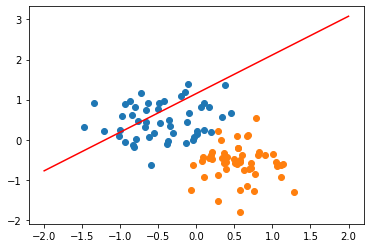

In [8]:
plot_fit("initial_model")

In [9]:
criterion= nn.BCELoss()
optimizer= torch.optim.SGD(model.parameters(), lr=0.01)

In [10]:
epochs=1000
losses=[]
for i in range(epochs):
    y_pred=model.forward(x_data)
    loss= criterion(y_pred, y_data)
    print("epoch:", i, "loss:", loss.item())

    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.6174639463424683
epoch: 2 loss: 0.6164201498031616
epoch: 3 loss: 0.6153794527053833
epoch: 4 loss: 0.614342451095581
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.6122783422470093
epoch: 7 loss: 0.6112515330314636
epoch: 8 loss: 0.6102280616760254
epoch: 9 loss: 0.6092080473899841
epoch: 10 loss: 0.6081910729408264
epoch: 11 loss: 0.6071775555610657
epoch: 12 loss: 0.606167733669281
epoch: 13 loss: 0.6051608324050903
epoch: 14 loss: 0.604157567024231
epoch: 15 loss: 0.6031574606895447
epoch: 16 loss: 0.602160632610321
epoch: 17 loss: 0.6011670827865601
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.599189817905426
epoch: 20 loss: 0.5982059836387634
epoch: 21 loss: 0.5972254276275635
epoch: 22 loss: 0.5962479114532471
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943028926849365
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923705101013184
epoch: 27 loss: 0.5914090275764465
epoch: 28 loss: 0.5904508829116821


epoch: 229 loss: 0.4477144181728363
epoch: 230 loss: 0.44719505310058594
epoch: 231 loss: 0.44667717814445496
epoch: 232 loss: 0.44616061449050903
epoch: 233 loss: 0.4456455707550049
epoch: 234 loss: 0.4451318681240082
epoch: 235 loss: 0.44461947679519653
epoch: 236 loss: 0.4441087245941162
epoch: 237 loss: 0.4435991942882538
epoch: 238 loss: 0.4430912137031555
epoch: 239 loss: 0.4425843358039856
epoch: 240 loss: 0.4420788586139679
epoch: 241 loss: 0.44157519936561584
epoch: 242 loss: 0.4410724341869354
epoch: 243 loss: 0.44057124853134155
epoch: 244 loss: 0.4400714039802551
epoch: 245 loss: 0.43957287073135376
epoch: 246 loss: 0.439075767993927
epoch: 247 loss: 0.43858009576797485
epoch: 248 loss: 0.438085675239563
epoch: 249 loss: 0.43759241700172424
epoch: 250 loss: 0.43710049986839294
epoch: 251 loss: 0.4366101026535034
epoch: 252 loss: 0.43612101674079895
epoch: 253 loss: 0.4356331527233124
epoch: 254 loss: 0.4351467192173004
epoch: 255 loss: 0.4346614181995392
epoch: 256 loss: 0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



546 loss: 0.33371248841285706
epoch: 547 loss: 0.3334653079509735
epoch: 548 loss: 0.3332185745239258
epoch: 549 loss: 0.3329722285270691
epoch: 550 loss: 0.332726389169693
epoch: 551 loss: 0.33248111605644226
epoch: 552 loss: 0.33223628997802734
epoch: 553 loss: 0.331991970539093
epoch: 554 loss: 0.3317481279373169
epoch: 555 loss: 0.3315047025680542
epoch: 556 loss: 0.3312618136405945
epoch: 557 loss: 0.33101943135261536
epoch: 558 loss: 0.3307774066925049
epoch: 559 loss: 0.3305359184741974
epoch: 560 loss: 0.3302949070930481
epoch: 561 loss: 0.33005428314208984
epoch: 562 loss: 0.32981422543525696
epoch: 563 loss: 0.3295745849609375
epoch: 564 loss: 0.32933560013771057
epoch: 565 loss: 0.3290967643260956
epoch: 566 loss: 0.3288586139678955
epoch: 567 loss: 0.3286207318305969
epoch: 568 loss: 0.32838356494903564
epoch: 569 loss: 0.32814663648605347
epoch: 570 loss: 0.32791030406951904
epoch: 571 loss: 0.32767432928085327
epoch: 572 loss: 0.3274388611316681
epoch: 573 loss: 0.3272037

epoch: 771 loss: 0.28814536333084106
epoch: 772 loss: 0.28797972202301025
epoch: 773 loss: 0.2878141701221466
epoch: 774 loss: 0.28764912486076355
epoch: 775 loss: 0.28748419880867004
epoch: 776 loss: 0.287319540977478
epoch: 777 loss: 0.28715524077415466
epoch: 778 loss: 0.28699102997779846
epoch: 779 loss: 0.2868272066116333
epoch: 780 loss: 0.2866637110710144
epoch: 781 loss: 0.28650033473968506
epoch: 782 loss: 0.2863372266292572
epoch: 783 loss: 0.2861744165420532
epoch: 784 loss: 0.28601181507110596
epoch: 785 loss: 0.28584957122802734
epoch: 786 loss: 0.28568747639656067
epoch: 787 loss: 0.28552567958831787
epoch: 788 loss: 0.28536418080329895
epoch: 789 loss: 0.2852029502391815
epoch: 790 loss: 0.2850418984889984
epoch: 791 loss: 0.2848811447620392
epoch: 792 loss: 0.28472068905830383
epoch: 793 loss: 0.2845603823661804
epoch: 794 loss: 0.28440046310424805
epoch: 795 loss: 0.28424060344696045
epoch: 796 loss: 0.2840811610221863
epoch: 797 loss: 0.28392186760902405
epoch: 798 lo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text(0.5, 0, 'epoch')

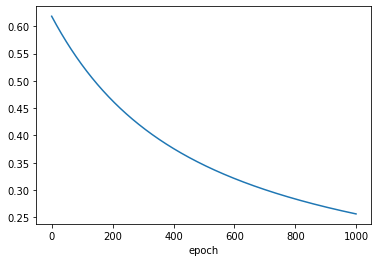

In [11]:
plt.plot(range(epochs), losses)
plt.xlabel('Loss')
plt.xlabel('epoch')

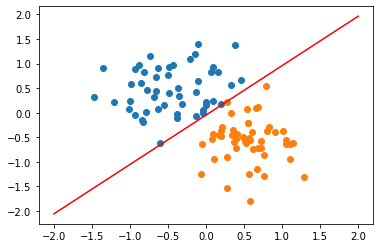

In [12]:
plot_fit("Trained_model")

red point posotive probability= 0.9424158334732056
black point posotive probability= 0.05055497586727142
red point in class1
black point in class0


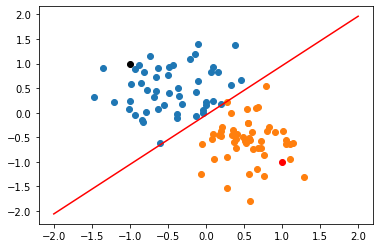

In [13]:
#testing over the unlabelled data

point1=torch.Tensor([1.0, -1.0])
point2=torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print('red point posotive probability= {}'.format(model.forward(point1).item()))
print('black point posotive probability= {}'.format(model.forward(point2).item()))
print('red point in class{}'.format(model.predict(point1)))
print('black point in class{}'.format(model.predict(point2)))
plot_fit("Trained Model")